<a href="https://colab.research.google.com/github/RafaelSJ0/Aulas-Mack/blob/main/PL_Python_4_exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1> 
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1> 

# 4 Estudos de Caso de Análise de Dados I
Professores: *Diego Nogare* & *Rogério de Oliveira* 

<br>
<br>

---


# Exercícios

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# WHO Worl Health Organization

Os dados abaixo foram obtidos diretamente da Organização Mundial de Saúde. Empregue os dados de 2015 já selecionados abaixo para responder as perguntas.

In [ ]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ]
WHO.head()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


# Qualidade dos Dados

Verifique a Qualidade dos Dados. Quantos atributos apresentam dados ausentes a qual atributo tem o maior percentual de dados ausentes?

Resposta: De acorto com o retorno dos dados "Total expenditure", tem a maior parte dos dados que estão ausentes, seguidos de Alcohol, Population, GDP.

In [ ]:
# O coódigo abaixo verifica todas as tabelas e soma os camposs que estão vazios e depois os exibe detalhadamente.
df = pd.DataFrame(WHO)
print(WHO.isnull().sum())
print(WHO.describe())



Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            177
percentage expenditure               0
Hepatitis B                          9
Measles                              0
BMI                                  2
under-five deaths                    0
Polio                                0
Total expenditure                  181
Diphtheria                           0
 HIV/AIDS                            0
GDP                                 29
Population                          41
 thinness  1-19 years                2
 thinness 5-9 years                  2
Income composition of resources     10
Schooling                           10
dtype: int64
         Year  Life_expectancy  Adult Mortality  infant deaths    Alcohol  \
count   183.0       183.000000       183.000000     

# Qualidade dos Dados

Alguns países estão classificados como países *em desenvolvimento* e parecem destoar do nosso entendimento geral de países *desenvolvidos $\times$ em desenvolvimento*. Quais dois países parecem se enquadrar neste caso?

(Dica: verifique os países em desenvolvimento que apresentam um GDP que discrepante dos demais) 

Resposta:Neste caso usei o metodo LOC para fazer a comparação entre as duas colunas e imprimir o GDP que é discrepante dos demais, só que neste caso ainda apareceu país desenvolvido, no caso o "Chile	Developing	85.0", "Albania Developing 77.8", "Antigua and Barbuda Developing 76.4", são alguns por ter a expectativa de vida alta.

In [ ]:

filtro = WHO.loc[WHO['Status'] != WHO['GDP']]
print(filtro.describe)




<bound method NDFrame.describe of                                  Country  Year      Status  Life_expectancy  \
0                            Afghanistan  2015  Developing             65.0   
16                               Albania  2015  Developing             77.8   
32                               Algeria  2015  Developing             75.6   
48                                Angola  2015  Developing             52.4   
64                   Antigua and Barbuda  2015  Developing             76.4   
...                                  ...   ...         ...              ...   
2858  Venezuela (Bolivarian Republic of)  2015  Developing             74.1   
2874                            Viet Nam  2015  Developing             76.0   
2890                               Yemen  2015  Developing             65.7   
2906                              Zambia  2015  Developing             61.8   
2922                            Zimbabwe  2015  Developing             67.0   

      Adult Morta

# Distribuição dos Dados

Analise a Distribuição da Expectativa de Vida entre os países Desenvolvidos e em Desenvolvimento. O que você consegue afirmar sobre essas distribuições? 

Resposta: Verifica-se que há mais países em desenvolvimento do que desenvolvidos e também que a expectativa de vida dos países desenvolvidos são bem maiores, contudo há um ou outro país em desenvolvimento que possui uma expectativa alta, podemos afirmar também que a maior expectativa de vida é de um país desenvolvido sendo "Slovenia Developed 88.0" e o menor é "Sierra Leone	Developing 51.0". 

In [ ]:
# Seu código
colunas_selecionadas = ['Status' , 'Life_expectancy']
tabela1 = WHO[colunas_selecionadas]
colunas_selecionadas = ['Status', 'Life_expectancy']
tabela2 = WHO[colunas_selecionadas]


df = pd.DataFrame(tabela1)
df = pd.DataFrame(tabela2)


df_filtrado1 = tabela1.loc[(tabela1['Status'] == 'Developed') & (tabela1['Life_expectancy'])]
print(df_filtrado1)
df_filtrado2 = tabela1.loc[(tabela1['Status'] == 'Developing') & (tabela1['Life_expectancy'])]
print(df_filtrado2)





         Status  Life_expectancy
112   Developed             82.8
128   Developed             81.5
240   Developed             81.1
384   Developed             74.5
641   Developed             78.0
673   Developed             85.0
689   Developed             78.8
737   Developed             86.0
994   Developed             81.0
1154  Developed             75.8
1170  Developed             82.7
1250  Developed             81.4
1282  Developed             82.7
1314  Developed             83.7
1442  Developed             74.6
1522  Developed             73.6
1538  Developed             82.0
1634  Developed             81.7
1829  Developed             81.9
1845  Developed             81.6
1910  Developed             81.8
2039  Developed             77.5
2055  Developed             81.1
2119  Developed             75.0
2313  Developed             83.1
2329  Developed             76.7
2345  Developed             88.0
2425  Developed             82.8
2505  Developed             82.4
2521  Deve

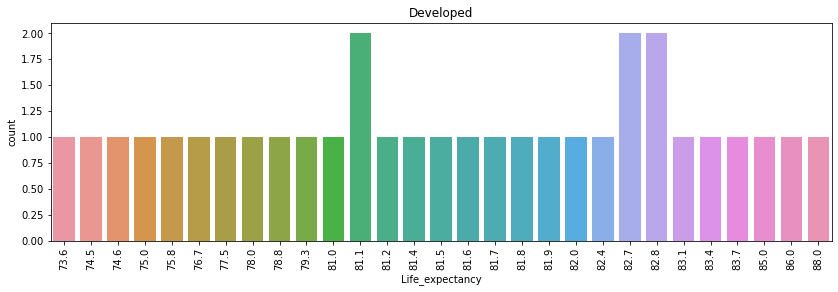

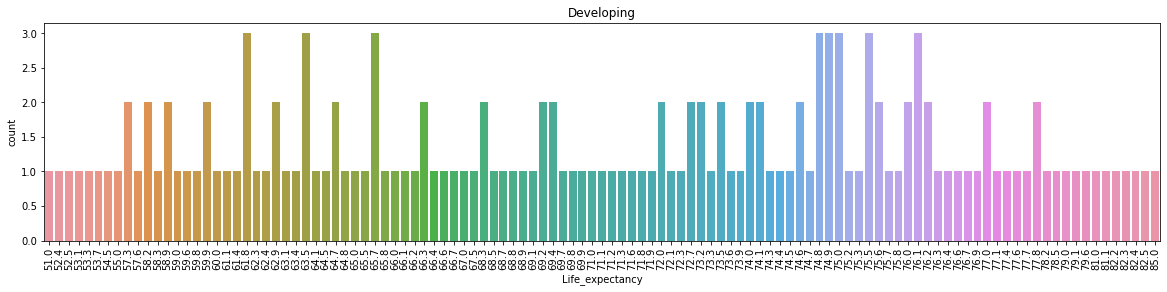

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14,4))
sns.countplot(x=df_filtrado1.Life_expectancy)
plt.title('Developed')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(20,4))
sns.countplot(x=df_filtrado2.Life_expectancy)
plt.title('Developing')
plt.xticks(rotation=90)
plt.show()


In [ ]:
WHO.loc[WHO.Life_expectancy.nlargest(10).index][['Country','Status','Life_expectancy']]



,Country,Status,Life_expectancy
2345,Slovenia,Developed,88.0
737,Denmark,Developed,86.0
544,Chile,Developing,85.0
673,Cyprus,Developed,85.0
1314,Japan,Developed,83.7
2521,Switzerland,Developed,83.4
2313,Singapore,Developed,83.1
112,Australia,Developed,82.8
2425,Spain,Developed,82.8
1170,Iceland,Developed,82.7


In [ ]:
WHO.loc[WHO.Life_expectancy.nsmallest(10).index][['Country','Status','Life_expectancy']]

,Country,Status,Life_expectancy
2297,Sierra Leone,Developing,51.0
48,Angola,Developing,52.4
512,Central African Republic,Developing,52.5
528,Chad,Developing,53.1
432,Côte d'Ivoire,Developing,53.3
1474,Lesotho,Developing,53.7
1893,Nigeria,Developing,54.5
2377,Somalia,Developing,55.0
480,Cameroon,Developing,57.3
2409,South Sudan,Developing,57.3


# Relações

Quais índices aparecem como mais correlacionados a Expectativa de Vida dos países em Desenvolvimento?  

Resposta: Aparecem mais relacionados a doenças e mortes adultas correlacionadas as doenças existentes, isso faz com que a expectativa de vida fique nos patamares mais baixos.

In [ ]:
# Seu código
WHO.loc[WHO.Life_expectancy.nsmallest(10).index][['Country','Life_expectancy','Adult Mortality','infant deaths','Polio','Hepatitis B']]

,Country,Life_expectancy,Adult Mortality,infant deaths,Polio,Hepatitis B
2297,Sierra Leone,51.0,413.0,22,86.0,86.0
48,Angola,52.4,335.0,66,7.0,64.0
512,Central African Republic,52.5,397.0,15,47.0,47.0
528,Chad,53.1,356.0,46,52.0,46.0
432,Côte d'Ivoire,53.3,397.0,57,81.0,83.0
1474,Lesotho,53.7,484.0,4,9.0,93.0
1893,Nigeria,54.5,344.0,483,49.0,49.0
2377,Somalia,55.0,312.0,50,47.0,42.0
480,Cameroon,57.3,357.0,45,83.0,84.0
2409,South Sudan,57.3,332.0,26,41.0,31.0


# Ranking

Qual a posição do Brasil no Ranking de Escolaridade (`Schooling`) com relação aos demais países? 

Resposta: No ranking de escolaridade o Brazil ocupa a posição 353, com o indice de Schooling 15.1.

In [ ]:
# Seu código
df1 = WHO.sort_values(by=['Schooling'], ascending=False)
posicao = df1['Schooling'].idxmax()
posicao_original = df1.index.get_loc(posicao)
posicao = df1.loc[df1['Country'] == 'Brazil'].index[0]
print('A posição do Brazil é: ', posicao+1)

A posição do Brazil é:  353
